In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from core.data import load_from_kaggle


c:\Anna-Project\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dataset_link = "zubairamuti/shopping-behaviours-dataset" # replace with your dataset link from Kaggle 
destination = "../data/raw"
dataset_name = dataset_link.split("/")[-1]

files = load_from_kaggle(
    dataset_link=dataset_link, 
    destination=destination,
    )

Destination directory '../data/raw\shopping-behaviours-dataset' already exists with files. Skipping download (replace=False).


In [4]:
files

['shopping_behavior_updated.csv']

In [5]:
df = pd.read_csv("/".join(["../data/raw/", dataset_name, files[0]]))
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [6]:
display(
    "Shape",
    df.shape,
    "Description",
    df.describe().round(2).T,
    "Duplicates",
    df.duplicated().sum(),
)


pd.DataFrame(
    {
        "Data Types": df.dtypes,
        "Missing Values": df.isnull().sum(),
        "Unique Values": df.nunique(),
        "Sample Values": [df[col].sample(3).tolist() for col in df.columns]
    })


'Shape'

(3900, 18)

'Description'

,count,mean,std,min,25%,50%,75%,max
Customer ID,3900.0,1950.50,1125.98,1.0,975.75,1950.5,2925.25,3900.0
Age,3900.0,44.07,15.21,18.0,31.00,44.0,57.00,70.0
Purchase Amount (USD),3900.0,59.76,23.69,20.0,39.00,60.0,81.00,100.0
Review Rating,3900.0,3.75,0.72,2.5,3.10,3.7,4.40,5.0
Previous Purchases,3900.0,25.35,14.45,1.0,13.00,25.0,38.00,50.0


'Duplicates'

np.int64(0)

,Data Types,Missing Values,Unique Values,Sample Values
Customer ID,int64,0,3900,"[2236, 475, 811]"
Age,int64,0,53,"[32, 21, 62]"
Gender,object,0,2,"[Male, Male, Male]"
Item Purchased,object,0,25,"[Coat, Handbag, Belt]"
Category,object,0,4,"[Footwear, Clothing, Outerwear]"
Purchase Amount (USD),int64,0,81,"[90, 85, 59]"
Location,object,0,50,"[Connecticut, Maryland, California]"
Size,object,0,4,"[XL, S, XL]"
Color,object,0,25,"[Maroon, Magenta, Purple]"
Season,object,0,4,"[Winter, Spring, Spring]"


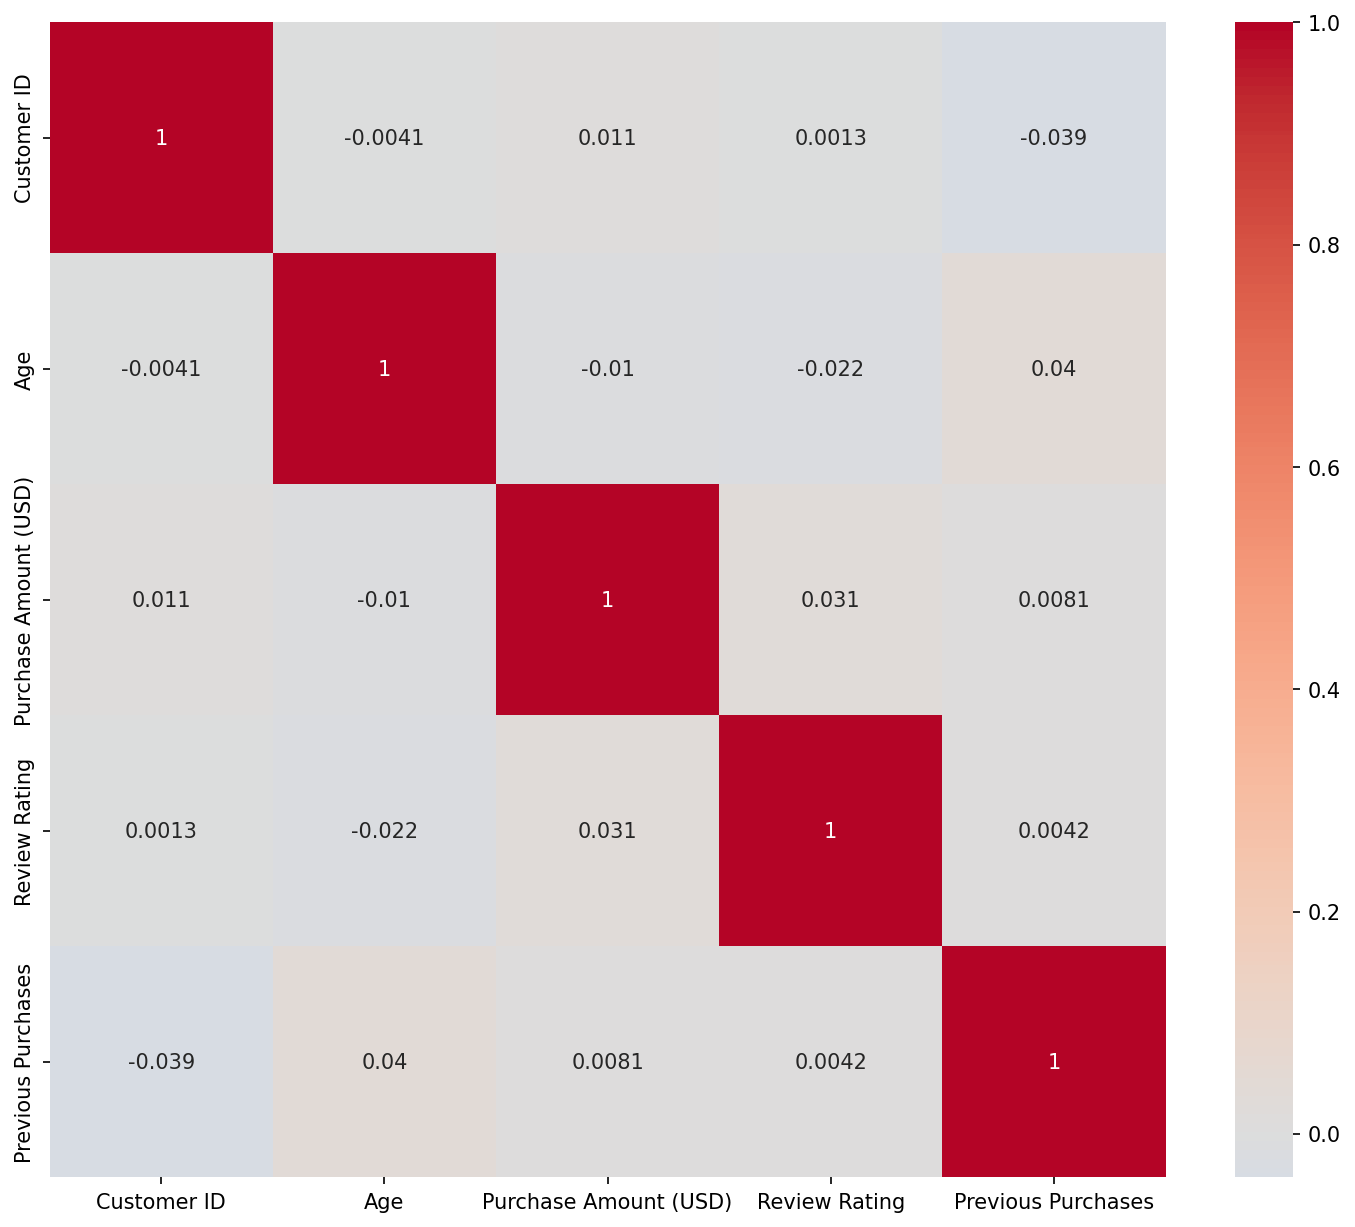

In [18]:
fig, ax = plt.subplots(figsize=(12, 10), dpi=150)

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0, ax=ax);

In [11]:
df.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [12]:
df['Category'].value_counts()


Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

In [13]:
df['Gender'].value_counts(normalize=True)


Gender
Male      0.68
Female    0.32
Name: proportion, dtype: float64

In [16]:
df['Customer ID'].nunique()



3900

In [17]:
from os import sync


sync

ImportError: cannot import name 'sync' from 'os' (C:\Users\Anna\AppData\Local\Programs\Python\Python313\Lib\os.py)